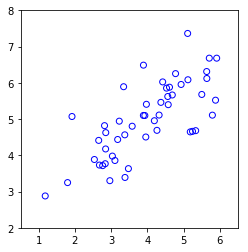

In [2]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt


mat_data = sio.loadmat('ex7/ex7data1.mat')
X = mat_data['X']

plt.figure()
plt.scatter(X[:, 0], X[:, 1], facecolors='none', edgecolors='b')
plt.xlim(0.5, 6.5)
plt.ylim(2, 8)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [3]:

def feature_normalize(X):
    """
    Normalizes the features in X.
    
    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples and n_features is the number of features.

    Returns
    -------
    X_norm : ndarray, shape (n_samples, n_features)
        Normalized training vectors.
    mu : ndarray, shape (n_feature, )
        Mean value of each feature.
    sigma : ndarray, shape (n_feature, )
        Standard deviation of each feature.
    """
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [4]:
def pca(X):
    """
    Run principal component analysis on the dataset X.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples and n_features is the number of features.

    Returns
    -------
    U : ndarray, shape (n_features, n_features)
        Unitary matrices.
    S : ndarray, shape (n_features,)
        The singular values for every matrix.
    V : ndarray, shape (n_features, n_features)
        Unitary matrices.
    """
    m, n = X.shape
    sigma = X.T.dot(X) / m
    U, S, V = np.linalg.svd(sigma)
    return U, S, V

In [8]:
import matplotlib.pyplot as plt


def draw_line(p1, p2, dash=False):
    """
    Draws a line from point p1 to point p2.
    Parameters
    ----------
    p1 : ndarray
        Point 1.
    p2 : ndarray
        Point 2.
    dash : bool
        True to plot dash line.
    """
    if dash:
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]], '--',color='k')
    else:
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]], color='k')

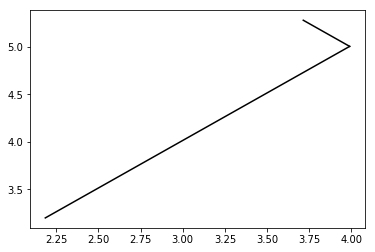

Top eigenvector:
U =  [-0.70710678 -0.70710678]
(you should expect to see -0.70710678 -0.70710678)


In [14]:
#from draw_line import draw_line


#  Before running PCA, it is important to first normalize X
X_norm, mu, sigma = feature_normalize(X)

# Run PCA
U, S, V = pca(X_norm)

plt.figure()
draw_line(mu, mu + 1.5 * S[0] * U[:,0].T)
draw_line(mu, mu + 1.5 * S[1] * U[:,1].T)
plt.show()

print('Top eigenvector:')
print('U = ', U[:, 0])
print('(you should expect to see -0.70710678 -0.70710678)')


In [15]:

def project_data(X, U, K):
    """
    Computes the reduced data representation when projecting only on to the top K eigenvectors.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples and n_features is the number of features.
    U : ndarray, shape (n_features, n_features)
        Unitary matrices.
    K : int
        Reduced dimension.

    Returns
    -------
    Z : ndarray, shape (n_samples, K)
        The projection of X into the reduced dimensional space spanned by the first K columns of U.
    """
    Z = X.dot(U[:, 0:K])
    return Z

In [16]:
def recover_data(Z, U, K):
    """
    Recovers an approximation of the original data when using the projected data.
    
    Parameters
    ----------
    Z : ndarray, shape (n_samples, K)
        The projected data, where n_samples is the number of samples and K is the number of reduced dimensions.
    U : ndarray, shape (n_features, n_features)
        Unitary matrices, where n_features is the number of features.
    K : int
        Reduced dimension.

    Returns
    -------
    X_rec : ndarray, shape (n_samples, n_features)
        The recovered samples.
    """
    X_rec = Z.dot(U[:, 0:K].T)
    return X_rec

Projection of the first example:  [1.48127391]
(this value should be about 1.48127391)
Approximation of the first example: [-1.04741883 -1.04741883]
(this value should be about  -1.04741883 -1.04741883)


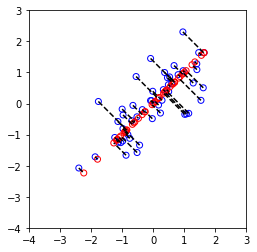

In [18]:
# Plot the normalized dataset (returned from pca)
plt.figure()
plt.scatter(X_norm[:, 0], X_norm[:, 1], facecolors='none', edgecolors='b')
plt.xlim(-4, 3)
plt.ylim(-4, 3)
plt.gca().set_aspect('equal', adjustable='box')

# Project the data onto K = 1 dimension
K = 1
Z = project_data(X_norm, U, K)
print('Projection of the first example: ', Z[0, ])
print('(this value should be about 1.48127391)')

X_rec = recover_data(Z, U, K)
print('Approximation of the first example:', X_rec[0, ])
print('(this value should be about  -1.04741883 -1.04741883)')

# Draw lines connecting the projected points to the original points
plt.scatter(X_rec[:, 0], X_rec[:, 1], facecolors='none', edgecolors='r')
for i in range(X_norm.shape[0]):
    draw_line(X_norm[i,:], X_rec[i,:], dash=True)
axes = plt.gca()
axes.set_xlim([-4, 3])
axes.set_ylim([-4, 3])
axes.set_aspect('equal', adjustable='box')
plt.show()

In [28]:
import matplotlib.pyplot as plt
import numpy as np


def display_data(x, tile_width=-1, padding=0, axes=None):
    """
    Display data in a nice grid
    Parameters
    ----------
    x : ndarray
        Raw data.
    tile_width : int
        Width of each image.
    padding : int
        Padding around the image.
    axes : matplotlib.axes.Axes
        The axes for the plot
    show : bool
        True to show the plot immediately.
    """
    m, n = x.shape

    if tile_width < 0:
        tile_width = int(np.round(np.sqrt(n)))
    tile_height = n / tile_width

    display_rows = int(np.floor(np.sqrt(m)))
    display_columns = int(np.ceil(m / display_rows))

    tile_height_padded = int(tile_height + padding * 2)
    tile_width_padded = int(tile_width + padding * 2)
    print(tile_height_padded)
    print(tile_width_padded)
    data = np.zeros((display_rows * int(tile_height_padded), display_columns * tile_width_padded))

    for i in range(display_rows):
        for j in range(display_columns):
            tile = format_tile(x[i * display_rows + j, ], tile_width, padding)
            tile = tile.T
            data[i * tile_height_padded:(i + 1) * tile_height_padded,
                 j * tile_width_padded:(j + 1) * tile_width_padded] = tile

    if axes:
        axes.imshow(data, cmap='gray', extent=[0, 1, 0, 1])
    else:
        plt.imshow(data, cmap='gray', extent=[0, 1, 0, 1])


def format_tile(x, width=-1, padding=0):
    """
    Format raw data to a 2-d array for plot.
    Parameters
    ----------
    x : ndarray
        Raw data, 1-d array.
    width : int
        Width of the image.
    padding : int
        Padding around the image.
    Returns
    -------
    ndarray
        The formatted 2-d array data for plot.
    """
    if width < 0:
        width = int(np.round(np.sqrt(len(x))))
    height = len(x) // width

    tile = np.ones((height + padding * 2, width + padding * 2))

    for i in range(padding, height + padding):
        tile[i, padding:(padding + width)] = x[((i - padding) * width):((i - padding) * width + width)]

    return tile

32
32


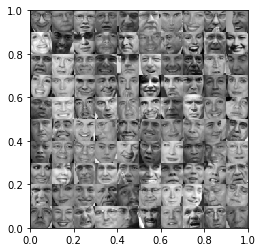

In [29]:
# Load Face dataset
mat_data = sio.loadmat('ex7/ex7faces.mat')
X = mat_data['X']

plt.figure()
display_data(X[0:100, :])
plt.show()

32
32


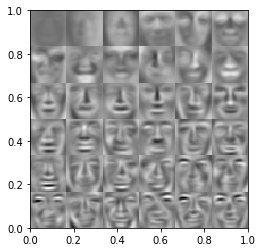

In [30]:
X_norm, mu, sigma = feature_normalize(X)

# Run PCA
U, S, V = pca(X_norm)

# Visualize the top 36 eigenvectors found
plt.figure()
display_data(U[:, 0:36].T)
plt.show()


In [32]:

K = 100
Z = project_data(X_norm, U, K)

print('The projected data Z has a size of:', Z.shape)

The projected data Z has a size of: (5000, 100)


32
32
32
32


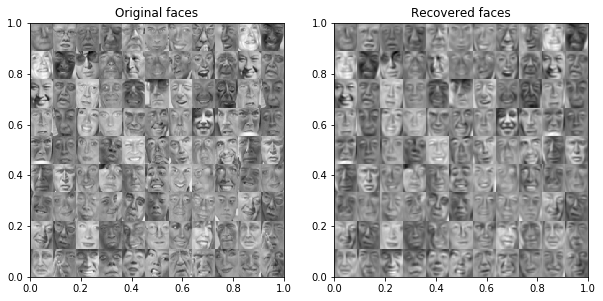

In [33]:

K = 100
X_rec = recover_data(Z, U, K)

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(1, 2, 1)
display_data(X_norm[1:100,:], axes=ax1)
ax1.set_title('Original faces')
ax2 = fig.add_subplot(1, 2, 2)
display_data(X_rec[1:100,:], axes=ax2)
ax2.set_title('Recovered faces')
plt.show()